# Assignment

## Instructions

### Text Classification for Spam Detection

In this assignment, you will build a text classification model using Naive Bayes to classify SMS messages as spam or ham (non-spam). You will implement text preprocessing techniques and use the Vector Space Model (TF-IDF) to represent the text data.

#### Dataset

You will be using the SMS Spam Collection dataset, which contains a set of SMS messages that have been labeled as either spam or ham (legitimate). This dataset is available through several Python libraries or can be downloaded directly.

#### Tasks

1. **Text Preprocessing**:

   - Load the dataset
   - Implement tokenization
   - Apply stemming or lemmatization
   - Remove stopwords

2. **Feature Extraction**:

   - Use TF-IDF vectorization to convert the text data into numerical features
   - Explore the most important features for spam and ham categories

3. **Classification**:

   - Split the data into training and testing sets
   - Train a Multinomial Naive Bayes classifier
   - Evaluate the model using appropriate metrics (accuracy, precision, recall, F1-score)
   - Create a confusion matrix to visualize the results

4. **Analysis**:
   - Analyze false positives and false negatives
   - Identify characteristics of messages that are frequently misclassified
   - Suggest improvements to your model

#### Starter Code


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import urllib.request

import nltk
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize
import spacy
nlp = spacy.load("en_core_web_sm")
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.corpus import stopwords
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report

# Load the SMS Spam Collection dataset
url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
urllib.request.urlretrieve(url, "sms.tsv")
sms_data = pd.read_csv('sms.tsv', sep='\t', header=None, names=['label', 'message'])
sms_data.head()

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/localuser/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/localuser/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/localuser/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/localuser/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [2]:
# Check data distribution
print(sms_data['label'].value_counts())

label
ham     4825
spam     747
Name: count, dtype: int64


In [3]:
# TODO: Implement text preprocessing

# Define a function to convert POS tag to a format recognized by the lemmatizer
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

def preprocess_text(text):
    # - Tokenization
    doc = nlp(text)
    tokens = [token.text for token in doc]
    print(f"tokens             : {tokens}")

    # - Stemming/Lemmatization
    lemmatizer = WordNetLemmatizer() # Initialize lemmatizer
    
    lemmatized_words = [lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in tokens] # Lemmatize tokens with POS tags
    print(f"lemmatized_words   : {lemmatized_words}")

    # - Stopwords removal
    stop_words = set(stopwords.words('english'))
    filtered_stop_words = [w for w in lemmatized_words if w not in stop_words and w.isalnum()]
    print(f"filtered_stop_words: {filtered_stop_words}")

    return filtered_stop_words

sms_data['processed_message'] = sms_data['message'].apply(preprocess_text)
sms_data['processed_message'] = sms_data['processed_message'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)
sms_data.head()

tokens             : ['Go', 'until', 'jurong', 'point', ',', 'crazy', '..', 'Available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', '...', 'Cine', 'there', 'got', 'amore', 'wat', '...']
lemmatized_words   : ['Go', 'until', 'jurong', 'point', ',', 'crazy', '..', 'Available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', '...', 'Cine', 'there', 'get', 'amore', 'wat', '...']
filtered_stop_words: ['Go', 'jurong', 'point', 'crazy', 'Available', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'Cine', 'get', 'amore', 'wat']
tokens             : ['Ok', 'lar', '...', 'Joking', 'wif', 'u', 'oni', '...']
lemmatized_words   : ['Ok', 'lar', '...', 'Joking', 'wif', 'u', 'oni', '...']
filtered_stop_words: ['Ok', 'lar', 'Joking', 'wif', 'u', 'oni']
tokens             : ['Free', 'entry', 'in', '2', 'a', 'wkly', 'comp', 'to', 'win', 'FA', 'Cup', 'final', 'tkts', '21st', 'May', '2005', '.', 'Text', 'FA', 'to', '87121', 'to', 'receive', 'entry', 'question(

,label,message,processed_message
0,ham,"Go until jurong point, crazy.. Available only ...",Go jurong point crazy Available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry 2 wkly comp win FA Cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,U dun say early hor U c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I think go usf life around though


In [4]:
# TODO: Apply TF-IDF vectorization

# Initialize a TF-IDF Vectorizer
vectorizer = TfidfVectorizer()

# Vectorize the documents
tfidf_matrix = vectorizer.fit_transform(sms_data['processed_message'])

# Display the TF-IDF matrix
print("TF-IDF matrix")
print(tfidf_matrix.toarray())

cosine_similarities = cosine_similarity(tfidf_matrix[1], tfidf_matrix)
print("\nCosine Similarities")
print(cosine_similarities)

TF-IDF matrix
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

Cosine Similarities
[[0. 1. 0. ... 0. 0. 0.]]


In [5]:
# TODO: Split data into training and testing sets

X = sms_data['processed_message']
y = sms_data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# TODO: Train a Multinomial Naive Bayes classifier

model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [7]:
# TODO: Evaluate the model

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       966
        spam       1.00      0.76      0.86       149

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.97      1115



In [8]:
# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=['Actual Ham', 'Actual Spam'], columns=['Predicted Ham', 'Predicted Spam'])

cm_df

,Predicted Ham,Predicted Spam
Actual Ham,966,0
Actual Spam,36,113


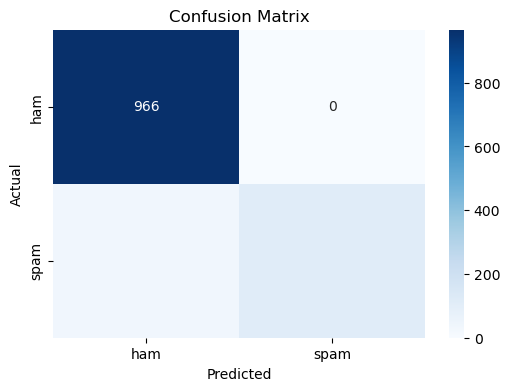

In [9]:
# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'], cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [10]:
# TODO: Analyze misclassifications

test_indices = y_test.index
results_df = pd.DataFrame({
    'message': sms_data.loc[test_indices, 'message'],
    'actual': y_test,
    'predicted': y_pred
})

false_positives_df = results_df[(results_df['actual'] == 'ham') & (results_df['predicted'] == 'spam')]
false_negatives_df = results_df[(results_df['actual'] == 'spam') & (results_df['predicted'] == 'ham')]

In [11]:
print(f"No. of False Positives: {len(false_positives_df)}")
false_positives_df

No. of False Positives: 0


,message,actual,predicted


In [12]:
print(f"No. of False Negatives: {len(false_negatives_df)}")
false_negatives_df

No. of False Negatives: 36


,message,actual,predicted
881,Reminder: You have not downloaded the content ...,spam,ham
1961,Guess what! Somebody you know secretly fancies...,spam,ham
3864,Oh my god! I've found your number again! I'm s...,spam,ham
2575,Your next amazing xxx PICSFREE1 video will be ...,spam,ham
2402,Babe: U want me dont u baby! Im nasty and have...,spam,ham
4527,"I want some cock! My hubby's away, I need a re...",spam,ham
2663,Hello darling how are you today? I would love ...,spam,ham
1022,Guess what! Somebody you know secretly fancies...,spam,ham
751,"Do you realize that in about 40 years, we'll h...",spam,ham
135,Want 2 get laid tonight? Want real Dogging loc...,spam,ham
